# Visualising Dataset

In [1]:
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## Spiral (Healthy)

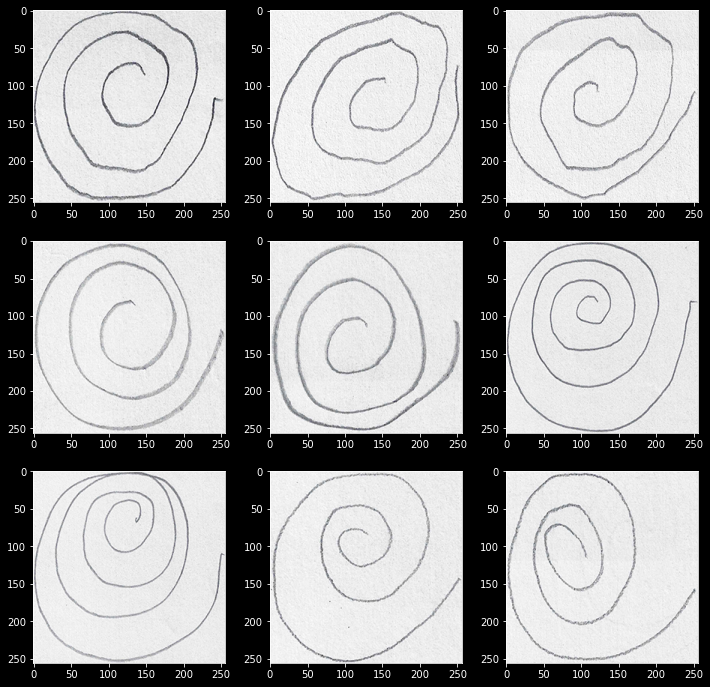

In [2]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/spiral/training/healthy/"+ os.listdir("drawings/spiral/training/healthy")[i])
    plt.imshow(img)   
plt.show() 

## Spiral (Parkinson)

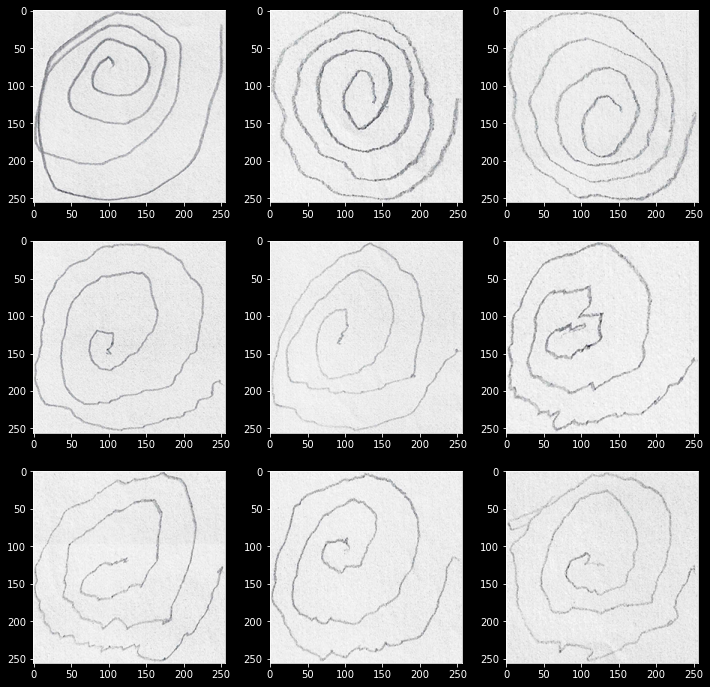

In [3]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/spiral/training/parkinson/"+
                  os.listdir("drawings/spiral/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

# # Wave (Healthy)

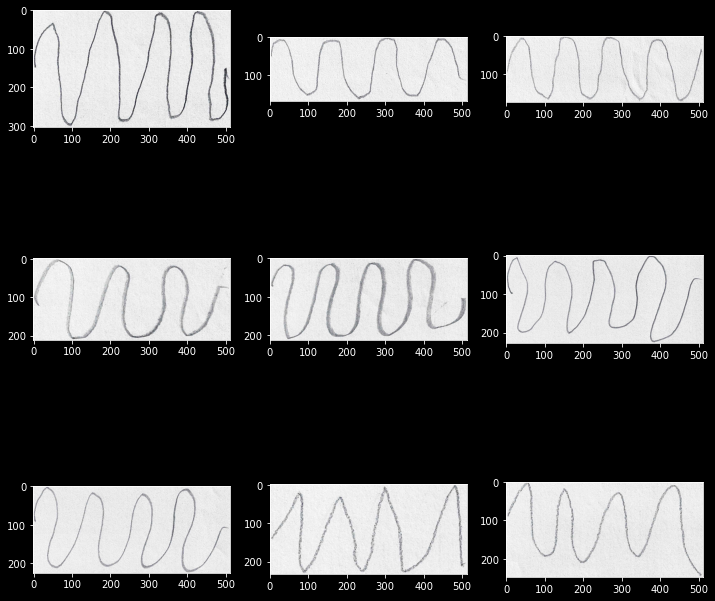

In [4]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/wave/training/healthy/"+
                  os.listdir("drawings/wave/training/healthy")[i])
    plt.imshow(img)   
plt.show()

# # Wave (Parkinson)

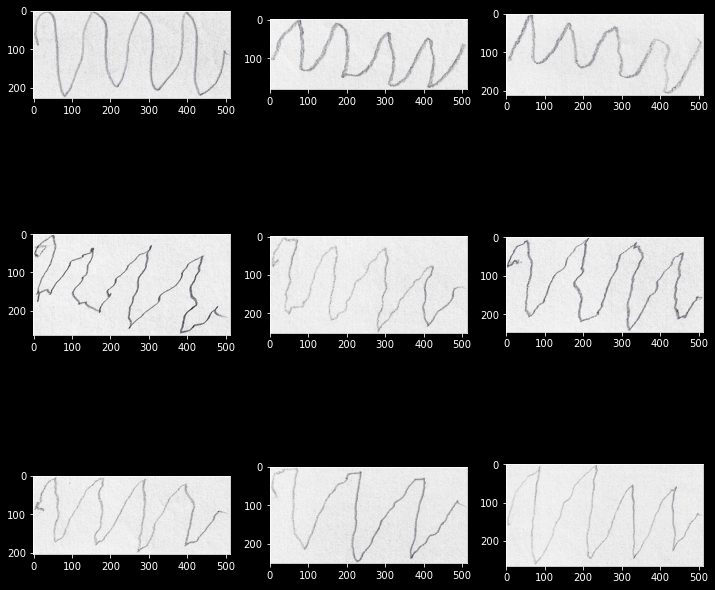

In [5]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/wave/training/parkinson/"+
                  os.listdir("drawings/wave/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

# Importing CNN Layers

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Building Classifier

In [7]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(activation='relu',units=128))
classifier.add(Dense(activation='sigmoid',units=1))

# Image Data Generation

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
spiral_train_generator = train_datagen.flow_from_directory('drawings/spiral/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

spiral_test_generator = test_datagen.flow_from_directory('drawings/spiral/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [11]:
wave_train_generator = train_datagen.flow_from_directory('drawings/wave/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory('drawings/wave/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


# Fitting The Model with Data

In [12]:
from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 48

classifier.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
history = classifier.fit(
        spiral_train_generator,
        steps_per_epoch=spiral_train_generator.n//spiral_train_generator.batch_size,
        epochs=48,
        validation_data=spiral_test_generator,
        validation_steps=spiral_test_generator.n//spiral_test_generator.batch_size,
        callbacks=callbacks_list)

Epoch 1/48
2/2 [==============================] - 1s 263ms/step - loss: 1.4275 - accuracy: 0.5000 - lr: 0.0010
Epoch 2/48
2/2 [==============================] - 1s 174ms/step - loss: 1.5075 - accuracy: 0.5000 - lr: 0.0010
Epoch 3/48
2/2 [==============================] - 1s 154ms/step - loss: 0.8691 - accuracy: 0.4500 - lr: 0.0010
Epoch 4/48
2/2 [==============================] - 1s 152ms/step - loss: 0.7277 - accuracy: 0.4000 - lr: 0.0010
Epoch 5/48
2/2 [==============================] - 1s 164ms/step - loss: 0.6944 - accuracy: 0.5000 - lr: 0.0010
Epoch 6/48
2/2 [==============================] - 1s 476ms/step - loss: 0.6938 - accuracy: 0.4844 - lr: 0.0010
Epoch 7/48
2/2 [==============================] - 1s 542ms/step - loss: 0.6927 - accuracy: 0.5750 - lr: 0.0010
Epoch 8/48
2/2 [==============================] - 1s 406ms/step - loss: 0.6900 - accuracy: 0.5469 - lr: 0.0010
Epoch 9/48
2/2 [==============================] - 1s 473ms/step - loss: 0.7144 - accuracy: 0.4750 - lr: 0.0010
E

# Plotting Accuracy and Loss

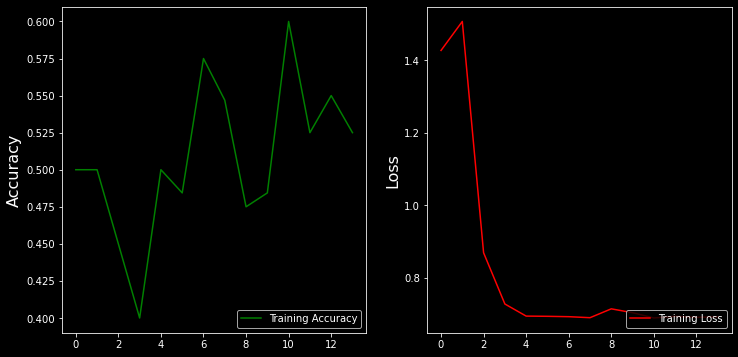

In [14]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()
